In [240]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

cars = pd.read_csv("Automobile_data.csv")

In [241]:
cars.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [242]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [243]:
cars['symboling'].astype('category').value_counts()

symboling
0     67
1     54
2     32
3     27
-1    22
-2     3
Name: count, dtype: int64

In [244]:
cars['aspiration'].astype('category').value_counts()

aspiration
std      168
turbo     37
Name: count, dtype: int64

In [245]:
cars['drive-wheels'].astype('category').value_counts()

drive-wheels
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64

<ipython-input-246-ad2aec4531b7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars['wheel-base'])


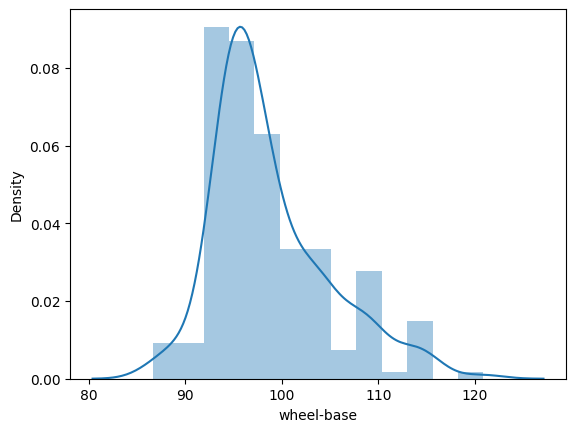

In [246]:
sns.distplot(cars['wheel-base'])
plt.show()

<ipython-input-247-d6ba726c27f7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars['curb-weight'])


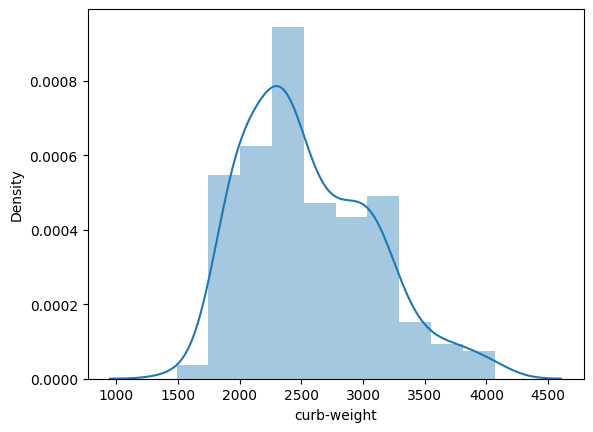

In [247]:
sns.distplot(cars['curb-weight'])
plt.show()

<ipython-input-248-a6c992291f0a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars['compression-ratio'])


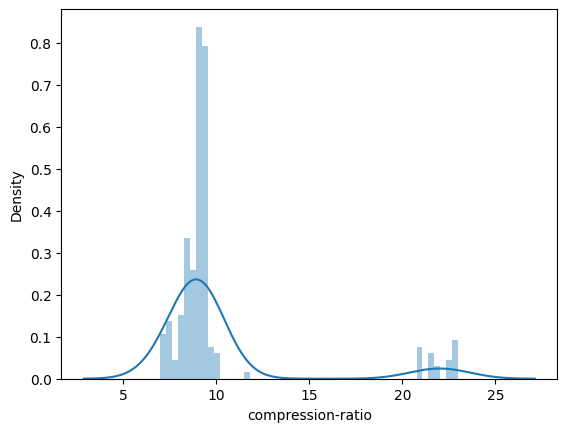

In [248]:
sns.distplot(cars['compression-ratio'])
plt.show()

In [249]:
cars['price'] = cars['price'].replace('[\$,]', '', regex=True)  # Remove $ and commas
cars['price'] = pd.to_numeric(cars['price'], errors='coerce')  # Convert to numeric, set errors to NaN

# Converting the column to float64
cars['price'] = cars['price'].astype('float64')

# similarly for rest values such as: bore,stroke,horsepower,peak-rpm
cars['bore'] = cars['bore'].replace('[\$,]', '', regex=True)
cars['bore'] = pd.to_numeric(cars['bore'], errors='coerce')
cars['bore'] = cars['bore'].astype('float64')

cars['stroke'] = cars['stroke'].replace('[\$,]', '', regex=True)
cars['stroke'] = pd.to_numeric(cars['stroke'], errors='coerce')
cars['stroke'] = cars['stroke'].astype('float64')

cars['horsepower'] = cars['horsepower'].replace('[\$,]', '', regex=True)
cars['horsepower'] = pd.to_numeric(cars['horsepower'], errors='coerce')
cars['horsepower'] = cars['horsepower'].astype('float64')

cars['peak-rpm'] = cars['peak-rpm'].replace('[\$,]', '', regex=True)
cars['peak-rpm'] = pd.to_numeric(cars['peak-rpm'], errors='coerce')
cars['peak-rpm'] = cars['peak-rpm'].astype('float64')

In [250]:
cars_numeric = cars.select_dtypes(include=['float64', 'int'])
cars_numeric.head()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [251]:
cars_numeric = cars_numeric.drop(['symboling'], axis=1)
cars_numeric.head()

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


<Figure size 2000x1000 with 0 Axes>

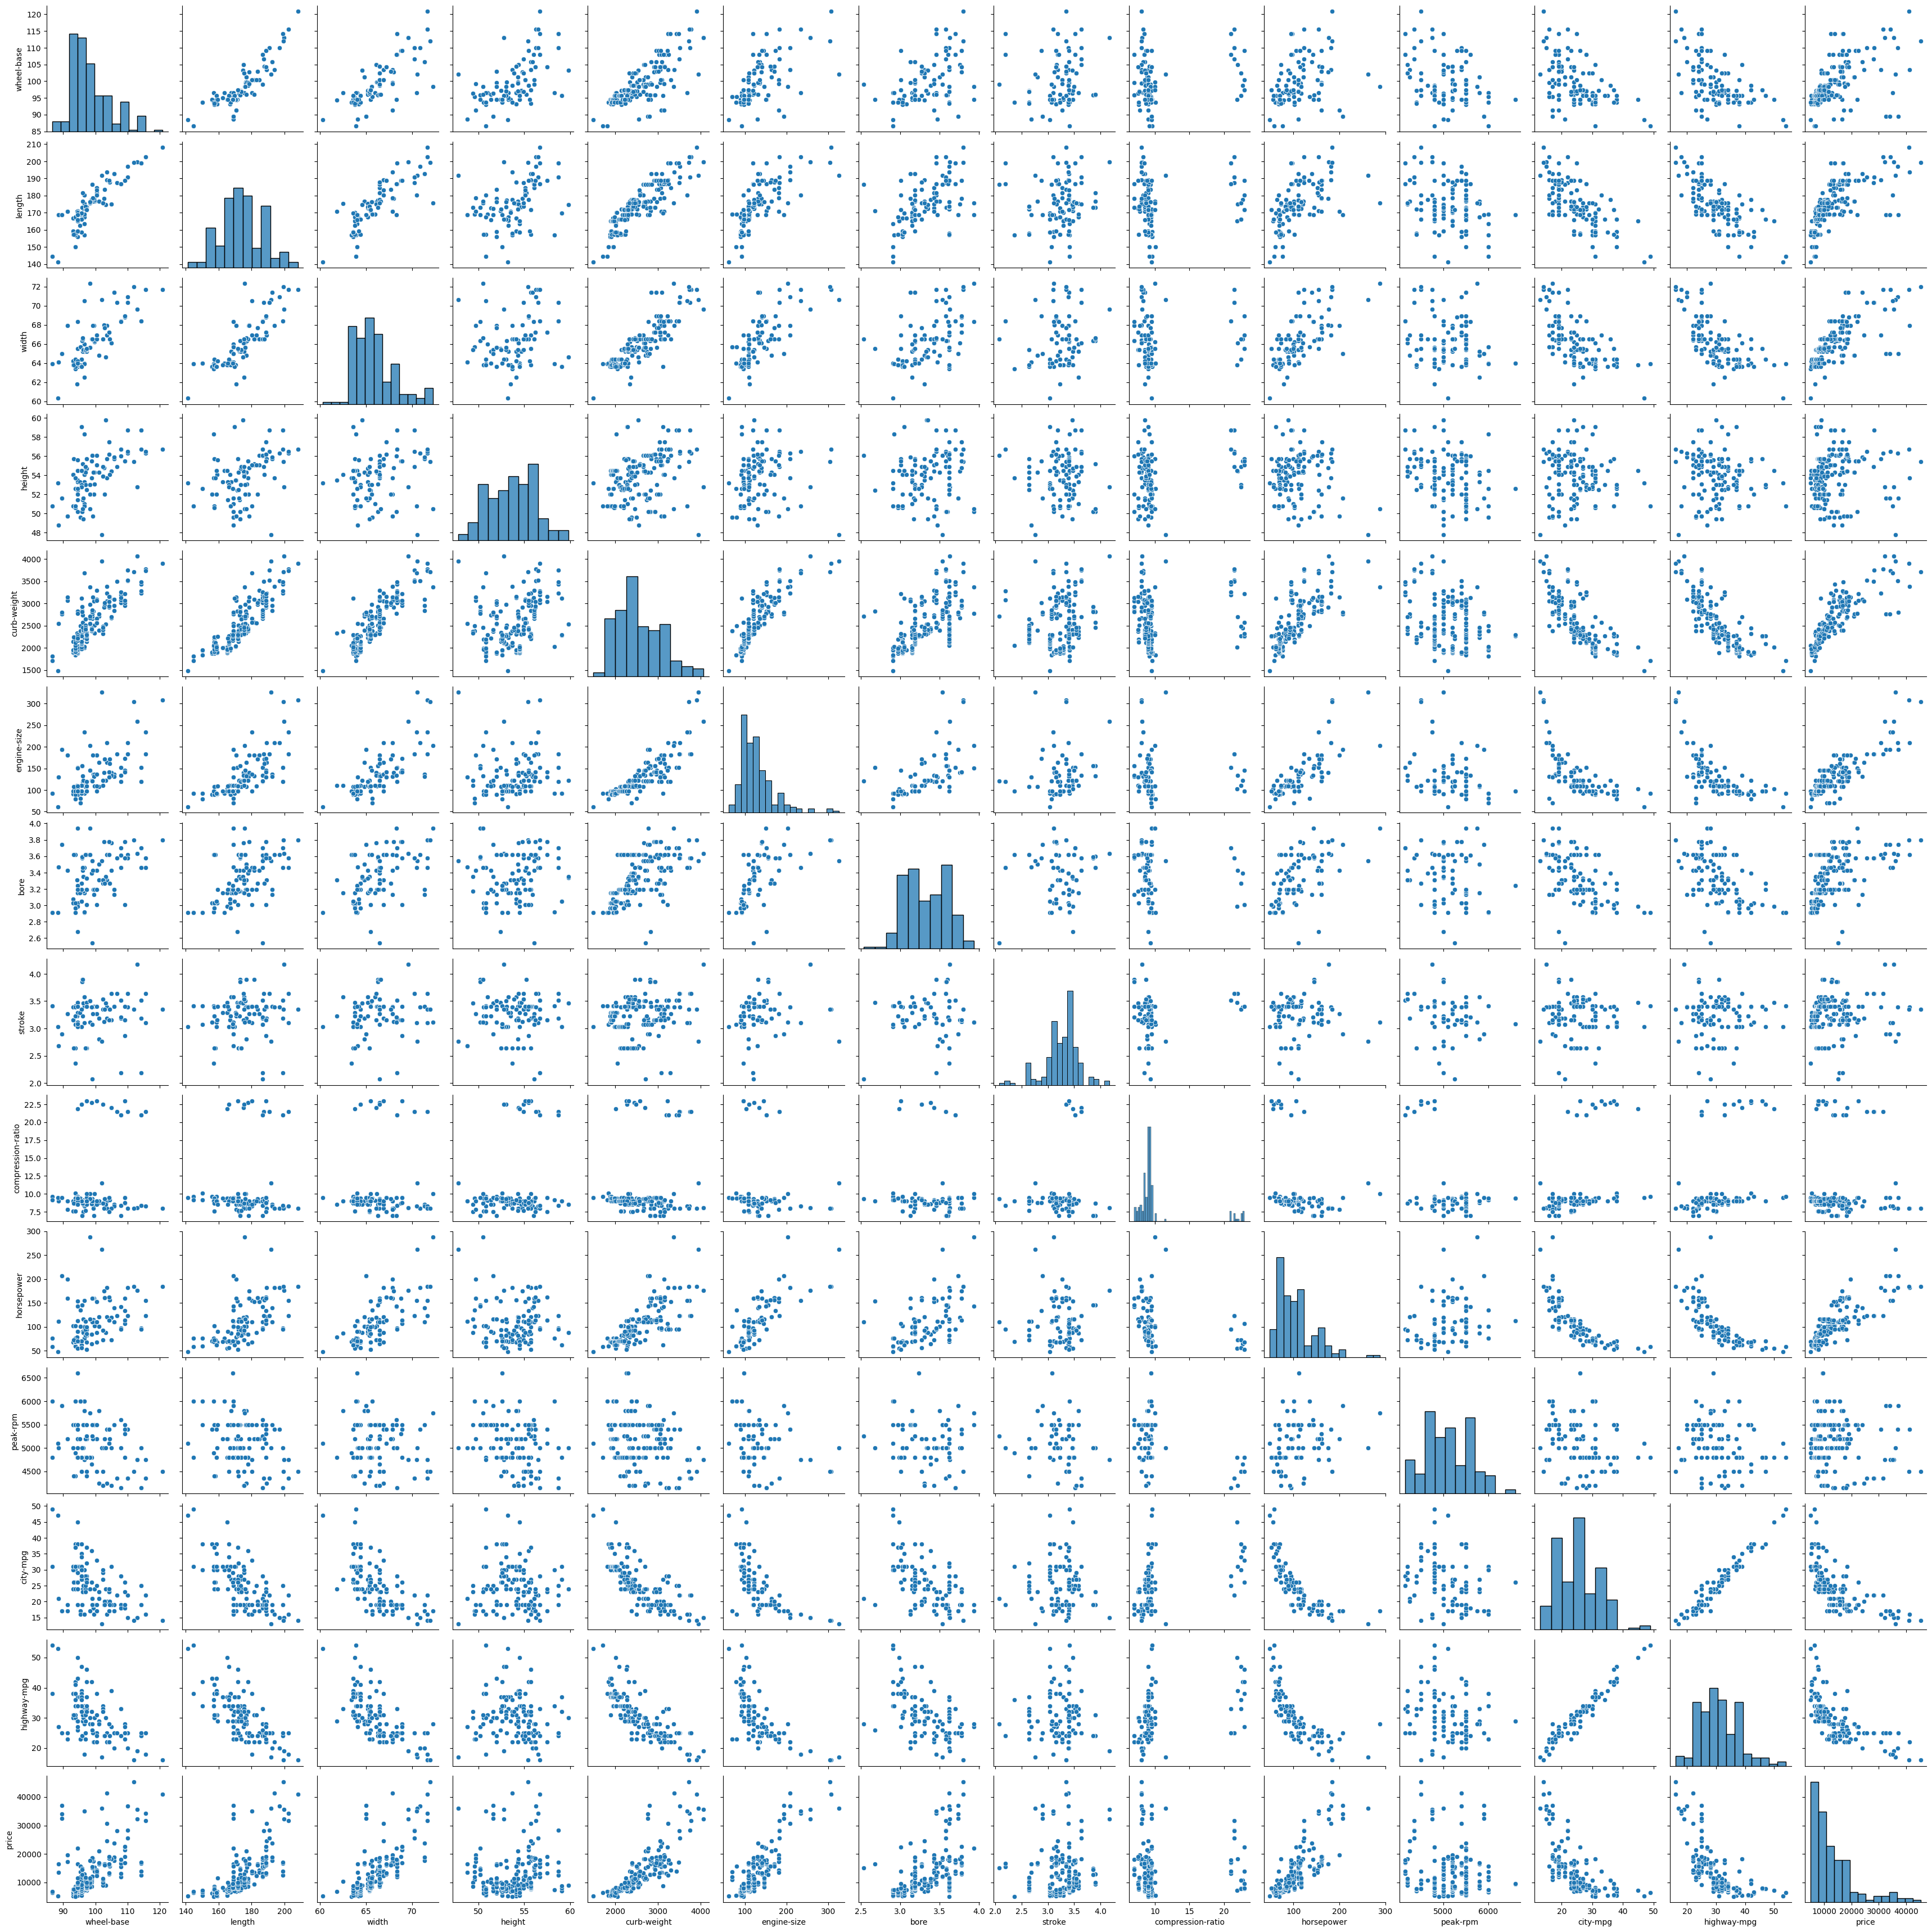

In [252]:
plt.figure(figsize=(20, 10))
sns.pairplot(cars_numeric)
plt.show()

In [253]:
# correlation matrix
cor = cars_numeric.corr()
cor

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
wheel-base,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.490378,0.161477,0.249786,0.352297,-0.361052,-0.470414,-0.544082,0.584642
length,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.607480,0.129739,0.158414,0.555003,-0.287325,-0.670909,-0.704662,0.690628
width,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559204,0.182956,0.181129,0.642482,-0.219957,-0.642704,-0.677218,0.751265
height,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.176195,-0.056999,0.261214,-0.110711,-0.322272,-0.048640,-0.107358,0.135486
curb-weight,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.649045,0.168929,0.151362,0.751034,-0.266306,-0.757414,-0.797465,0.834415
engine-size,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.594090,0.206675,0.028971,0.810773,-0.244618,-0.653658,-0.677470,0.872335
bore,0.490378,0.607480,0.559204,0.176195,0.649045,0.594090,1.000000,-0.055909,0.005203,0.577273,-0.264269,-0.594584,-0.594572,0.543436
stroke,0.161477,0.129739,0.182956,-0.056999,0.168929,0.206675,-0.055909,1.000000,0.186170,0.090254,-0.071493,-0.042906,-0.044528,0.082310
compression-ratio,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005203,0.186170,1.000000,-0.205874,-0.436221,0.324701,0.265201,0.071107
horsepower,0.352297,0.555003,0.642482,-0.110711,0.751034,0.810773,0.577273,0.090254,-0.205874,1.000000,0.130971,-0.803620,-0.770908,0.810533


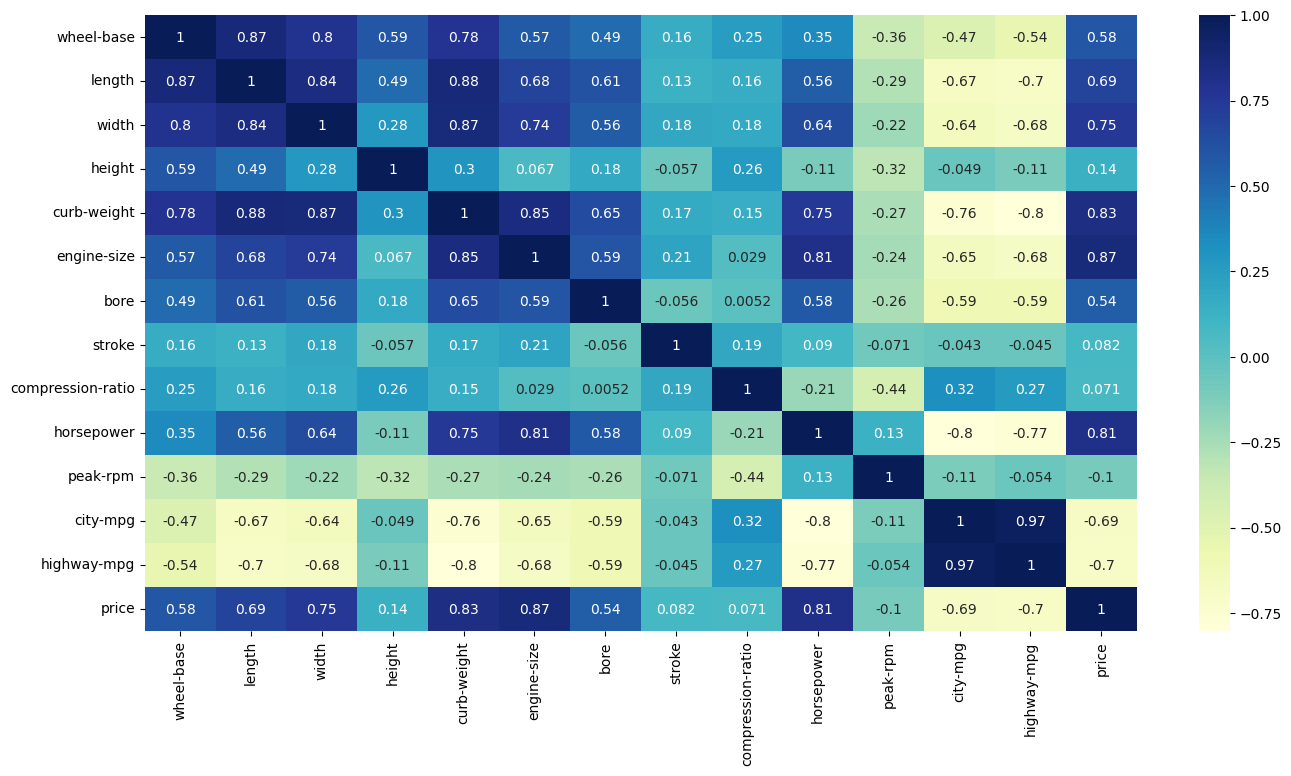

In [254]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [255]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [256]:
cars['symboling'] = cars['symboling'].astype('object')
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    object 
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [257]:
cars['make'][:30]

0     alfa-romero
1     alfa-romero
2     alfa-romero
3            audi
4            audi
5            audi
6            audi
7            audi
8            audi
9            audi
10            bmw
11            bmw
12            bmw
13            bmw
14            bmw
15            bmw
16            bmw
17            bmw
18      chevrolet
19      chevrolet
20      chevrolet
21          dodge
22          dodge
23          dodge
24          dodge
25          dodge
26          dodge
27          dodge
28          dodge
29          dodge
Name: make, dtype: object

In [258]:
carnames = cars['make'].apply(lambda x: x.split(" ")[0])
carnames[:30]

0     alfa-romero
1     alfa-romero
2     alfa-romero
3            audi
4            audi
5            audi
6            audi
7            audi
8            audi
9            audi
10            bmw
11            bmw
12            bmw
13            bmw
14            bmw
15            bmw
16            bmw
17            bmw
18      chevrolet
19      chevrolet
20      chevrolet
21          dodge
22          dodge
23          dodge
24          dodge
25          dodge
26          dodge
27          dodge
28          dodge
29          dodge
Name: make, dtype: object

In [259]:
import re

# regex: any alphanumeric sequence before a space, may contain a hyphen
p = re.compile(r'\w+-?\w+')
carnames = cars['make'].apply(lambda x: re.findall(p, x)[0])
print(carnames)


0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: make, Length: 205, dtype: object


In [260]:
# New column car_company
cars['car_company'] = cars['make'].apply(lambda x: re.findall(p, x)[0])

In [261]:
cars['car_company'].astype('category').value_counts()

car_company
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: count, dtype: int64

In [262]:
# volkswagen
cars.loc[(cars['car_company'] == "vw") |
         (cars['car_company'] == "vokswagen")
         , 'car_company'] = 'volkswagen'

# porsche
cars.loc[cars['car_company'] == "porcshce", 'car_company'] = 'porsche'

# mazda
cars.loc[cars['car_company'] == "maxda", 'car_company'] = 'mazda'

In [263]:
cars['car_company'].astype('category').value_counts()

car_company
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: count, dtype: int64

In [264]:
cars = cars.drop('make', axis=1)

In [265]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    object 
 1   normalized-losses  205 non-null    object 
 2   fuel-type          205 non-null    object 
 3   aspiration         205 non-null    object 
 4   num-of-doors       205 non-null    object 
 5   body-style         205 non-null    object 
 6   drive-wheels       205 non-null    object 
 7   engine-location    205 non-null    object 
 8   wheel-base         205 non-null    float64
 9   length             205 non-null    float64
 10  width              205 non-null    float64
 11  height             205 non-null    float64
 12  curb-weight        205 non-null    int64  
 13  engine-type        205 non-null    object 
 14  num-of-cylinders   205 non-null    object 
 15  engine-size        205 non-null    int64  
 16  fuel-system        205 non

In [266]:
cars.describe()

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [267]:

cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    object 
 1   normalized-losses  205 non-null    object 
 2   fuel-type          205 non-null    object 
 3   aspiration         205 non-null    object 
 4   num-of-doors       205 non-null    object 
 5   body-style         205 non-null    object 
 6   drive-wheels       205 non-null    object 
 7   engine-location    205 non-null    object 
 8   wheel-base         205 non-null    float64
 9   length             205 non-null    float64
 10  width              205 non-null    float64
 11  height             205 non-null    float64
 12  curb-weight        205 non-null    int64  
 13  engine-type        205 non-null    object 
 14  num-of-cylinders   205 non-null    object 
 15  engine-size        205 non-null    int64  
 16  fuel-system        205 non

In [268]:
# split into X and y
X = cars.loc[:, ['symboling','normalized-losses','fuel-type','aspiration',
                 'num-of-doors','body-style','drive-wheels','engine-location',
                 'wheel-base','length','width','height','curb-weight','engine-type',
                 'num-of-cylinders','engine-size','fuel-system','bore',	'stroke',
                 'compression-ratio','city-mpg','highway-mpg']]

y = cars['price']

In [269]:
# creating dummy variables for categorical variables

# subset all categorical variables
cars_categorical = X.select_dtypes(include=['object'])
cars_categorical.head()

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,3,?,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,3,?,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,1,?,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,2,164,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,2,164,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [270]:
# convert into dummies
cars_dummies = pd.get_dummies(cars_categorical, drop_first=True)
cars_dummies.head()

,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,normalized-losses_102,normalized-losses_103,normalized-losses_104,normalized-losses_106,normalized-losses_107,...,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [271]:
# drop categorical variables
X = X.drop(list(cars_categorical.columns), axis=1)


# concat dummy variables with X
X = pd.concat([X, cars_dummies], axis=1)

# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size',
       'bore', 'stroke', 'compression-ratio', 'city-mpg', 'highway-mpg',
       'symboling_-1', 'symboling_0', 'symboling_1', 'symboling_2',
       'symboling_3', 'normalized-losses_102', 'normalized-losses_103',
       'normalized-losses_104', 'normalized-losses_106',
       'normalized-losses_107', 'normalized-losses_108',
       'normalized-losses_110', 'normalized-losses_113',
       'normalized-losses_115', 'normalized-losses_118',
       'normalized-losses_119', 'normalized-losses_121',
       'normalized-losses_122', 'normalized-losses_125',
       'normalized-losses_128', 'normalized-losses_129',
       'normalized-losses_134', 'normalized-losses_137',
       'normalized-losses_142', 'normalized-losses_145',
       'normalized-losses_148', 'normalized-losses_150',
       'normalized-losses_153', 'normalized-losses_154',
       'normalized-losses_158', 'normalized-losses_161',
       'normalized-loss

In [272]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7,test_size = 0.3, random_state=100)

In [273]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

# Impute missing values in X_train
X_train_imputed = imputer.fit_transform(X_train)

# Impute missing values in y_train
y_train_imputed = imputer.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Create a LinearRegression object
lm = LinearRegression()

# Fit the model
lm.fit(X_train_imputed, y_train_imputed)

LinearRegression()

In [274]:
print(lm.coef_)
print(lm.intercept_)

[ 2.23742540e+03 -2.71089208e+03  9.01565310e+02  3.96087619e+02
  2.35484413e+03  4.63905472e+03  1.84322096e+03 -2.09457612e+03
  8.72548489e+03  4.08156235e+02 -2.97285528e+02  2.29125335e+03
  6.96048909e+03  5.49294767e+03  4.44546684e+03  3.17003538e+03
 -5.94934555e+01  4.30612131e+02 -2.54361918e+02 -2.56726226e+02
 -4.42997964e+01 -1.38265147e+03  7.64321853e+01  1.97071211e+02
 -5.08244561e+02 -2.87555212e+02 -2.21460367e+02  9.76769541e+01
 -3.78115620e+02 -1.66167920e+02 -4.27302637e+02 -1.56707849e+02
 -1.54173754e+03  1.82941300e+02 -2.13247563e+02 -5.65849492e+02
  1.78894155e+02 -6.25947367e+02  2.21364386e+02  2.27514307e+02
  4.76481573e+02 -3.95491659e+02  7.10324698e+02 -3.36622237e+02
 -1.51577658e+02 -9.96277793e+02 -3.62600629e+02 -6.00435324e+02
 -7.49457939e+02 -6.88116221e+02  2.17573393e+02  5.29058409e+02
  1.48246646e+02 -1.71162575e+02  2.20226945e+00 -2.13114232e+02
 -1.40240771e+02  1.97116708e+02 -4.32020647e+02  1.04918953e+02
 -3.33541870e+02 -4.80884

In [275]:
# predict
y_pred = lm.predict(X_test)

# metrics
from sklearn.metrics import r2_score

print(r2_score(y_true=y_test, y_pred=y_pred))

0.7732328822349743


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [276]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Create a LinearRegression object
lm = LinearRegression()

# Create an RFE object with 15 features
rfe_15 = RFE(estimator=lm, n_features_to_select=15)

# Fit the RFE object to the data
rfe_15.fit(X_train_imputed, y_train_imputed)

# Print the boolean results
print(rfe_15.support_)
print(rfe_15.ranking_)


[ True  True  True False  True  True False  True  True False False False
 False False False False False False False False False False False False
 False False False False False False False False  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True  True False  True False False  True
 False False False False  True  True False False  True False False False
 False]
[ 1  1  1 63  1  1 32  1  1 43 44 39 10 11 12 13 79 40 74 54 80  8 78 41
 38 65 68  9 57 75 60 76  1 47 30 26 46 50 37 45 27 67 25 61 56 18 55 22
 17 24 36 16 28 70 81 66 77 49 53 62 51 52 21 64 48 59 73  2  3  6  5 33
  4 34 35 31 14  1  1 15  1 23 69  1 20 19 29 42  1  1 71 72  1 82  7 58
 83]


In [277]:
# making predictions using rfe model
y_pred = rfe_15.predict(X_test)

# r-squared
print(r2_score(y_test, y_pred))

0.8815800178329687


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RFE was fitted without feature names
  warnings.warn(


In [278]:
# RFE with 6 features
from sklearn.feature_selection import RFE

# RFE with 6 features
lm = LinearRegression()
rfe_6 = RFE(estimator=lm, n_features_to_select=6)

# fit with 6 features
rfe_6.fit(X_train_imputed, y_train_imputed)

# predict
y_pred = rfe_6.predict(X_test)
print(r2_score(y_test, y_pred))

0.863383398455152


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RFE was fitted without feature names
  warnings.warn(


In [279]:
import statsmodels.api as sm

# subset the features selected by rfe_15
col_15 = X_train.columns[rfe_15.support_]

# subsetting training data for 15 selected columns
X_train_rfe_15 = X_train[col_15]

# add a constant to the model
X_train_rfe_15 = sm.add_constant(X_train_rfe_15)
X_train_rfe_15.head()

,const,wheel-base,length,width,curb-weight,engine-size,stroke,compression-ratio,normalized-losses_134,engine-location_rear,engine-type_dohcv,engine-type_ohc,engine-type_rotor,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_idi
122,1.0,-0.841772,-0.548402,-0.984972,-0.701886,-0.695874,-0.080470,-0.187398,-0.17364,-0.121867,-0.070014,0.620593,-0.141069,-0.070014,-0.141069,-0.328798
125,1.0,-0.708596,-0.418396,1.117866,0.428245,0.579974,-0.460303,-0.162161,-0.17364,-0.121867,-0.070014,0.620593,-0.141069,-0.070014,-0.141069,-0.328798
166,1.0,-0.708596,-0.434647,-0.891512,-0.492032,-0.695874,-0.555261,-0.187398,-0.17364,-0.121867,-0.070014,-1.611363,-0.141069,-0.070014,-0.141069,-0.328798
1,1.0,-1.690772,-0.426521,-0.844782,-0.014566,0.074449,-1.821370,-0.288349,-0.17364,-0.121867,-0.070014,-1.611363,-0.141069,-0.070014,-0.141069,-0.328798
199,1.0,0.922815,1.198549,0.603839,1.157921,0.074449,-0.333692,-0.666913,-0.17364,-0.121867,-0.070014,0.620593,-0.141069,-0.070014,-0.141069,-0.328798


In [280]:
X_train_rfe_15 = rfe_15.transform(X_train_imputed)

# Check for NaN or infinite values in X_train_rfe_15
X_train_rfe_15_df = pd.DataFrame(X_train_rfe_15)

# Replace infinite values with NaN
X_train_rfe_15_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with any NaN values
X_train_rfe_15_df.dropna(inplace=True)

X_train_rfe_15_df = sm.add_constant(X_train_rfe_15_df)
lm_15 = sm.OLS(y_train_imputed, X_train_rfe_15_df).fit()

print(lm_15.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     70.46
Date:                Tue, 09 Jul 2024   Prob (F-statistic):           4.53e-53
Time:                        11:50:10   Log-Likelihood:                -1326.0
No. Observations:                 143   AIC:                             2682.
Df Residuals:                     128   BIC:                             2726.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.343e+04    232.716     57.700      0.0

In [281]:
# making predictions using rfe_15 sm model
X_test_rfe_15 = X_test[col_15]


# # Adding a constant variable
X_test_rfe_15 = sm.add_constant(X_test_rfe_15, has_constant='add')
X_test_rfe_15.info()


# # Making predictions
y_pred = lm_15.predict(X_test_rfe_15)

<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, 160 to 128
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   const                    62 non-null     float64
 1   wheel-base               62 non-null     float64
 2   length                   62 non-null     float64
 3   width                    62 non-null     float64
 4   curb-weight              62 non-null     float64
 5   engine-size              62 non-null     float64
 6   stroke                   62 non-null     float64
 7   compression-ratio        62 non-null     float64
 8   normalized-losses_134    62 non-null     float64
 9   engine-location_rear     62 non-null     float64
 10  engine-type_dohcv        62 non-null     float64
 11  engine-type_ohc          62 non-null     float64
 12  engine-type_rotor        62 non-null     float64
 13  num-of-cylinders_twelve  62 non-null     float64
 14  num-of-cylinders_two     62 no

In [282]:
# r-squared
r2_score(y_test, y_pred)

0.8815800178329686

In [283]:
# subset the features selected by rfe_6
col_6 = X_train.columns[rfe_6.support_]

# subsetting training data for 6 selected columns
X_train_rfe_6 = X_train[col_6]

# add a constant to the model
X_train_rfe_6 = sm.add_constant(X_train_rfe_6)

X_train_rfe_6 = rfe_6.transform(X_train_imputed)

# Check for NaN or infinite values in X_train_rfe_6
X_train_rfe_6_df = pd.DataFrame(X_train_rfe_6)

# Replace infinite values with NaN
X_train_rfe_6_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with any NaN values
X_train_rfe_6_df.dropna(inplace=True)

X_train_rfe_6_df = sm.add_constant(X_train_rfe_6_df)

# fitting the model with 6 variables
lm_6 = sm.OLS(y_train_imputed, X_train_rfe_6_df).fit()
print(lm_6.summary())


# making predictions using rfe_6 sm model
X_test_rfe_6 = X_test[col_6]


# Adding a constant
X_test_rfe_6 = sm.add_constant(X_test_rfe_6, has_constant='add')
X_test_rfe_6.info()


# # Making predictions
y_pred = lm_6.predict(X_test_rfe_6)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     117.7
Date:                Tue, 09 Jul 2024   Prob (F-statistic):           2.42e-51
Time:                        11:50:10   Log-Likelihood:                -1350.4
No. Observations:                 143   AIC:                             2715.
Df Residuals:                     136   BIC:                             2735.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.342e+04    264.990     50.644      0.0

In [284]:
r2_score(y_test, y_pred)

0.8633833984551517

In [285]:
n_features_list = list(range(4, 20))
adjusted_r2 = []
r2 = []
test_r2 = []

for n_features in range(4, 20):

    # RFE with n features
    lm = LinearRegression()

    # specify number of features
    rfe_n = RFE(estimator=lm, n_features_to_select=n_features)

    # fit with n features
    rfe_n.fit(X_train_imputed, y_train_imputed)

    # subset the features selected by rfe_6
    col_n = X_train.columns[rfe_n.support_]

    # subsetting training data for 6 selected columns
    X_train_rfe_n = X_train[col_n]

    # add a constant to the model
    X_train_rfe_n = sm.add_constant(X_train_rfe_n)

    X_train_rfe_n = rfe_n.transform(X_train_imputed)

    # Check for NaN or infinite values in X_train_rfe_n
    X_train_rfe_n_df = pd.DataFrame(X_train_rfe_n)

    # Replace infinite values with NaN
    X_train_rfe_n_df.replace([np.inf, -np.inf], np.nan, inplace=True)

    # Drop rows with any NaN values
    X_train_rfe_n_df.dropna(inplace=True)

    X_train_rfe_n_df = sm.add_constant(X_train_rfe_n_df)

    # fitting the model with 6 variables
    lm_n = sm.OLS(y_train_imputed, X_train_rfe_n).fit()
    adjusted_r2.append(lm_n.rsquared_adj)
    r2.append(lm_n.rsquared)

    # making predictions using rfe_15 sm model
    X_test_rfe_n = X_test[col_n]

    # # Adding a constant variable
    # X_test_rfe_n = sm.add_constant(X_test_rfe_n, has_constant='add')

    #  # # Making predictions
    y_pred = lm_n.predict(X_test_rfe_n)

    test_r2.append(r2_score(y_test, y_pred))

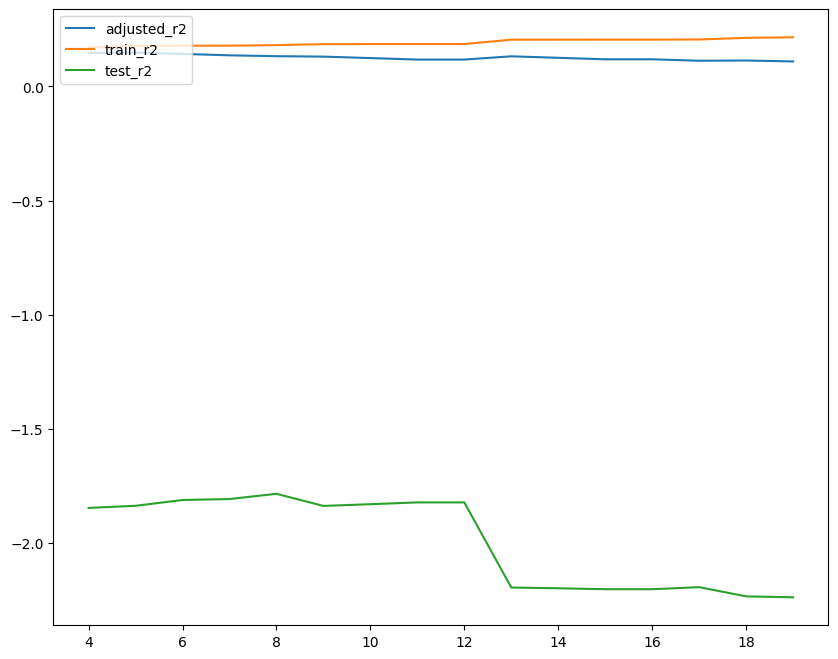

In [286]:
# plotting adjusted_r2 against n_features
plt.figure(figsize=(10, 8))
plt.plot(n_features_list, adjusted_r2, label="adjusted_r2")
plt.plot(n_features_list, r2, label="train_r2")
plt.plot(n_features_list, test_r2, label="test_r2")
plt.legend(loc='upper left')
plt.show()

In [290]:
lm = LinearRegression()
n_features = 6  # Number of features to select

# Fit RFE to select n_features
rfe_n = RFE(estimator=lm, n_features_to_select=n_features)
rfe_n.fit(X_train_imputed, y_train_imputed)

# Select columns based on RFE selection
col_n = X_train.columns[rfe_n.support_]

# Subset the training data with selected columns
X_train_rfe_n = X_train[col_n]

# Align indices of X_train_rfe_n and y_train_imputed if needed
X_train_rfe_n = X_train_rfe_n.reset_index(drop=True)  # Reset index to avoid index mismatch

# Fit OLS model with selected features
X_train_rfe_n = sm.add_constant(X_train_rfe_n)  # Add constant for intercept

X_train_rfe_n = rfe_n.transform(X_train_imputed)

    # Check for NaN or infinite values in X_train_rfe_n
X_train_rfe_n_df = pd.DataFrame(X_train_rfe_n)

    # Replace infinite values with NaN
X_train_rfe_n_df.replace([np.inf, -np.inf], np.nan, inplace=True)

    # Drop rows with any NaN values
X_train_rfe_n_df.dropna(inplace=True)

X_train_rfe_n_df = sm.add_constant(X_train_rfe_n_df)
lm_n = sm.OLS(y_train_imputed, X_train_rfe_n).fit()

# Step 2: Prepare X_test for prediction
# Subset X_test with selected columns
X_test_rfe_n = X_test[col_n]

# Handle missing values in X_test_rfe_n (if any)
imputer = SimpleImputer(strategy='mean')
X_test_rfe_n_imputed = imputer.fit_transform(X_test_rfe_n)

# Add constant to X_test_rfe_n_imputed
X_test_rfe_n_imputed = sm.add_constant(X_test_rfe_n_imputed)

# Step 3: Make predictions
y_pred = lm_n.predict(X_test_rfe_n_imputed)

# Step 4: Evaluate predictions
test_r2 = r2_score(y_test, y_pred)

In [292]:
lm_n.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.178
Model:                            OLS   Adj. R-squared (uncentered):              0.142
Method:                 Least Squares   F-statistic:                              4.960
Date:                Tue, 09 Jul 2024   Prob (F-statistic):                    0.000126
Time:                        11:51:05   Log-Likelihood:                         -1564.1
No. Observations:                 143   AIC:                                      3140.
Df Residuals:                     137   BIC:                                      3158.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          2764.4884   2427.271      1.139      0.257   -2035.272    7564.249
x2          3814.7524   2660.997      1.434      0.154   -1447.185    9076.690
x3          -459.8292   1479.156     -0.311      0.756   -3384.759    2465.101
x4          -139.6466   1736.174     -0.080      0.936   -3572.811    3293.518
x5          -117.6144   1563.226     -0.075      0.940   -3208.786    2973.558
x6          1329.9450   1138.093      1.169      0.245    -920.555    3580.445
==============================================================================
Omnibus:                       46.378   Durbin-Watson:                   0.129
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.952
Skew:                           1.205   Prob(JB):                     1.23e-32
Kurtosis:                       7.343   Cond. No.                         4.48
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [293]:
# results
r2_score(y_test, y_pred)

-1.8114778964596336

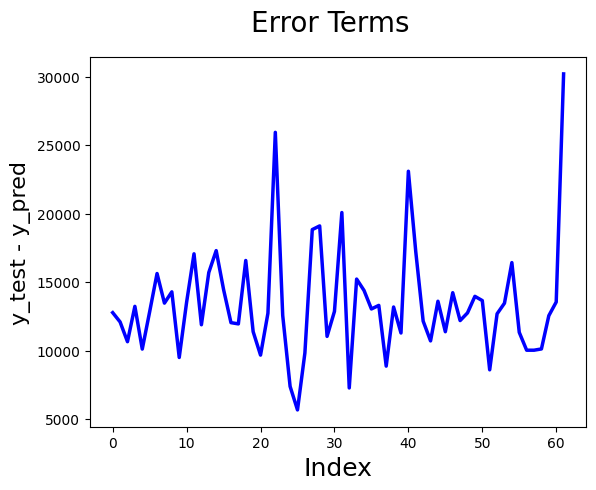

In [294]:
# Plotting error terms
c = [i for i in range(len(y_test))]  # Generate indices for plotting
fig = plt.figure()
plt.plot(c, y_test - y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)  # Plot heading
plt.xlabel('Index', fontsize=18)  # X-label
plt.ylabel('y_test - y_pred', fontsize=16)  # Y-label
plt.show()

<ipython-input-295-0e720ce44ff3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-y_pred),bins=50)


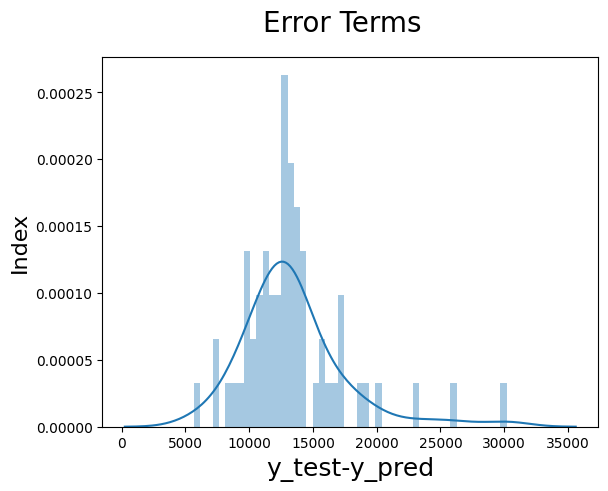

In [295]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_test-y_pred),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label
plt.show()

In [296]:
# mean
np.mean(y_test-y_pred)

13423.233086343569

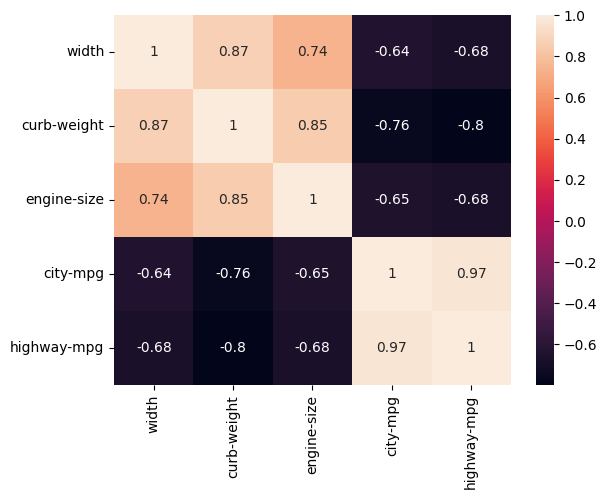

In [297]:
# multicollinearity
predictors = ['width', 'curb-weight', 'engine-size','city-mpg','highway-mpg']
cors = X.loc[:, list(predictors)].corr()
sns.heatmap(cors, annot=True)
plt.show()